In [7]:
#importing libraries
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [8]:
df_DA=df[df['job_title']=='Data Analyst'].copy()

In [9]:
df_DA_exploded=df_DA.explode('job_skills')

In [10]:
df_DA_exploded=df_DA_exploded.dropna(subset=['job_skills','salary_year_avg'])

In [6]:
df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.0,NaN,Western Digital,sql,"{'analyst_tools': ['tableau', 'power bi', 'exc..."
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.0,NaN,Western Digital,tableau,"{'analyst_tools': ['tableau', 'power bi', 'exc..."
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.0,NaN,Western Digital,power bi,"{'analyst_tools': ['tableau', 'power bi', 'exc..."
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.0,NaN,Western Digital,excel,"{'analyst_tools': ['tableau', 'power bi', 'exc..."
2390,Data Analyst,Data Analyst,"Midland, TX",via Indeed,Full-time,False,Sudan,2023-08-25 13:40:40,False,True,Sudan,year,70000.0,NaN,"Advanced Stimulation Technologies, Inc",c,"{'analyst_tools': ['outlook', 'word', 'excel',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782979,Data Analyst,Data Analyst,"Oslo, Norway",via Ai-Jobs.net,Full-time,False,Norway,2023-05-11 06:32:43,False,False,Norway,year,98500.0,NaN,Unacast,git,"{'cloud': ['bigquery', 'gcp'], 'libraries': ['..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,sql,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,python,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,r,"{'analyst_tools': ['looker'], 'programming': [..."


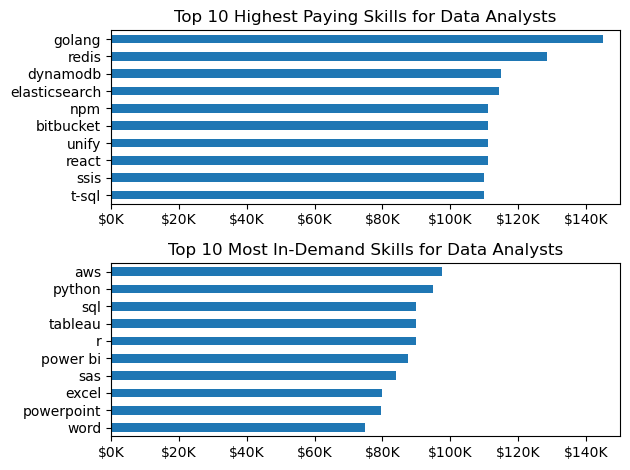

In [11]:
fig, ax = plt.subplots(2,1)

df_DA_exploded.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).head(10).plot(kind='barh',ax=ax[0]).invert_yaxis()
ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].set_ylabel('')
ax[0].set_xlim(0,150000)


df_DA_exploded.groupby('job_skills').agg(
    job_count=('job_skills','count'),
    salary_median=('salary_year_avg','median')
).sort_values(by='job_count',ascending=False).head(10).sort_values(by='salary_median',ascending=False).reset_index().plot(kind='barh',x='job_skills',y='salary_median',ax=ax[1]).invert_yaxis()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_ylabel('')
ax[1].legend().remove()

ax[1].set_xlim(0,150000)
plt.tight_layout()

In [12]:
import seaborn as sns

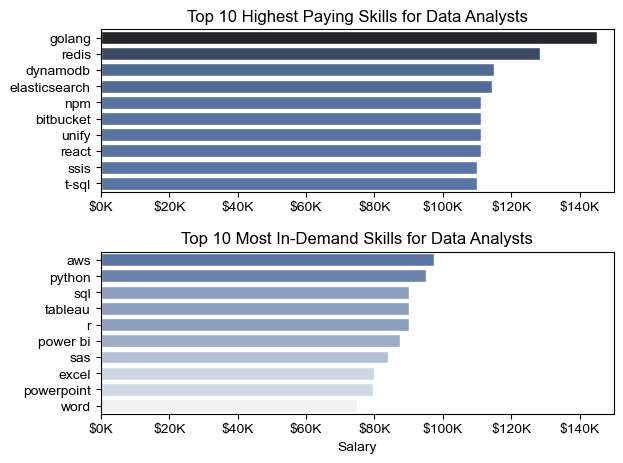

In [30]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')    

df_DA_salary=df_DA_exploded.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).head(10).reset_index()
#plot(kind='barh',ax=ax[0]).invert_yaxis()
sns.barplot(data=df_DA_salary,y='job_skills',x='salary_year_avg',ax=ax[0],hue='salary_year_avg',palette='dark:b_r')

ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0,150000)
ax[0].legend().remove()



df_DA_skills=df_DA_exploded.groupby('job_skills').agg(
    job_count=('job_skills','count'),
    salary_median=('salary_year_avg','median')
).sort_values(by='job_count',ascending=False).head(10).sort_values(by='salary_median',ascending=False)
#.plot(kind='barh',x='job_skills',y='salary_median',ax=ax[1]).invert_yaxis()
sns.barplot(data=df_DA_skills.reset_index(),y='job_skills',x='salary_median',ax=ax[1],hue='salary_median',palette='light:b')  
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_ylabel('')
ax[1].set_xlabel('Salary')
ax[1].legend().remove()

ax[1].set_xlim(0,150000)
plt.tight_layout()
plt.show()


In [18]:
df_DA_salary


,job_skills,salary_year_avg
0,golang,145000.0
1,redis,128500.0
2,dynamodb,115000.0
3,elasticsearch,114250.0
4,npm,111202.0
5,bitbucket,111175.0
6,unify,111175.0
7,react,111175.0
8,ssis,110000.0
9,t-sql,110000.0
